In [1]:
# Import dependencies.
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Scrape the data in the HTML table in the Mars Temperature Data site.
# Use Pandas' "read_html" method. This method will read any to all HTML tables on the web page
# into a list of DataFrame objects. This will require the "lxml" library or the combination of
# the "bs4" and "html5lib" libraries to parse the HTML script
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
dfs = pd.read_html(url)
print(f"Total tables: {len(dfs)}")

Total tables: 1


In [3]:
# Store the DataFrame.
mars_df = dfs[0]

# Check out the DataFrame
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [4]:
# Check out the DataFrame 
mars_df.tail()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0
1866,1895,2018-02-27,1977,135,5,-77.0,727.0


In [5]:
# Check out the DataFrame 
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [6]:
# With the DataFrame established, set the data types to the correct types.
mars_df[["id", "sol", "ls", "month"]] = mars_df[["id", "sol", "ls", "month"]].astype("int64")
mars_df[["min_temp", "pressure"]] = mars_df[["min_temp", "pressure"]].astype(float)
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])

# Verify the data types are correct.
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [7]:
# How many months exist on Mars?
mars_month = mars_df["month"].max()
print(f"Mars has {mars_month} months.")

Mars has 12 months.


In [8]:
# How many Martian (and not Earth) days' worth of data exist in the scraped dataset?
mars_days = mars_df["sol"].max() - mars_df["sol"].min()
print(f"The scraped dataset spans {mars_days: ,} Martian days.")

The scraped dataset spans  1,967 Martian days.


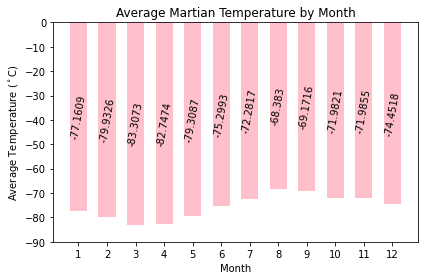

In [9]:
# What are the coldest and the warmest months on Mars (at the location of the Curiosity)?

# Get the average values grouped by month.
monthly = mars_df.groupby(by = "month").mean()

# Get the temperatures.
avg_temp = monthly["min_temp"]

# Plot the monthly average temperatures.
fig, ax = plt.subplots()

fig = ax.bar(range(1, 13), avg_temp, width = 0.6, color = "pink")

# Add the title and format the axes
ax.set_title("Average Martian Temperature by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Average Temperature ($^\circ$C)")
ax.set_xticks(np.arange(1, 13, step = 1))
ax.set_yticks(np.arange(0, -91, step = -10))

# Add the labels
ax.bar_label(fig, label_type = "center", rotation = 80)

plt.tight_layout()
plt.show()

In [10]:
# Print the answer.
print(f"The coldest month is Month 3 with an average temperature of {avg_temp.min(): .6}\N{DEGREE SIGN}C.")
print(f"The warmest month is Month 8 with an average temperature of {avg_temp.max(): .6}\N{DEGREE SIGN}C.")

The coldest month is Month 3 with an average temperature of -83.3073°C.
The warmest month is Month 8 with an average temperature of -68.383°C.


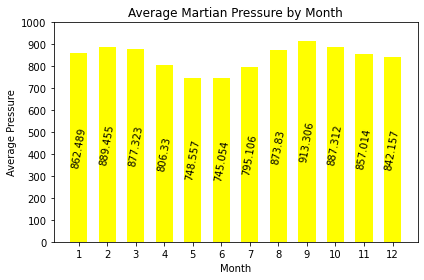

In [11]:
# Which months have the lowest and the highest atmospheric pressure on Mars (at the location of the Curiosity)?

# Get the pressures from the monthly averages.
avg_press = monthly["pressure"]

# Plot the monthly average temperatures.
fig, ax = plt.subplots()

fig = ax.bar(range(1, 13), avg_press, width = 0.6, color = "yellow")

# Add the title and format the axes
ax.set_title("Average Martian Pressure by Month")
ax.set_xlabel("Month")
ax.set_ylabel("Average Pressure")
ax.set_xticks(np.arange(1, 13, step = 1))
ax.set_yticks(np.arange(0, 1001, step = 100))

# Add the labels
ax.bar_label(fig, label_type = "center", rotation = 80, color= "black")

plt.tight_layout()
plt.show()

In [12]:
# Print the answer.
print(f"Month 6 has the lowest pressure with an average pressure of {avg_press.min(): .6} Pascals.")
print(f"Month 9 has the greatest pressure with an average pressure of {avg_press.max(): .6} Pascals.")

Month 6 has the lowest pressure with an average pressure of  745.054 Pascals.
Month 9 has the greatest pressure with an average pressure of  913.306 Pascals.


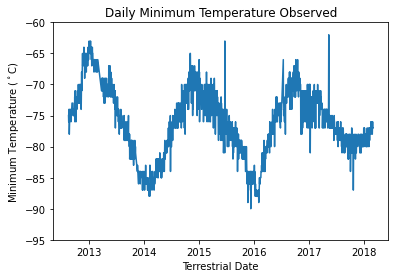

In [40]:
# About how many terrestrial (Earth) days exist in a Martian year?
plt.plot(mars_df["terrestrial_date"], mars_df["min_temp"])
plt.title("Daily Minimum Temperature Observed")
plt.xlabel("Terrestrial Date")
plt.ylabel("Minimum Temperature ($^\circ$C)")
plt.yticks(np.arange(-60, -96, step = -5))
plt.show()

In [14]:
# Print the answer.
print(f"The plot seems to show about three Martian cycles over about 5.5 terrestrial years (plus one leap year day).")

x = ((365 * 5.5) + 1)/3

print(f"Thus, one Martian year would contain about {x} terrestrial days.")
print(f"The Mars Facts website (https://galaxyfacts-mars.com) states that one Martian year is about 687 terrestrial days.")

err = (x - 687)/687

print(f"So the error would be {err: .2%}.")

The plot seems to show about three Martian cycles over about 5.5 terrestrial years (plus one leap year day).
Thus, one Martian year would contain about 669.5 terrestrial days.
The Mars Facts website (https://galaxyfacts-mars.com) states that one Martian year is about 687 terrestrial days.
So the error would be -2.55%.


In [15]:
# Export the DataFrame into a CSV.
mars_df.to_csv("mars_data.csv", index = False)

In [16]:
# Create an instance of MongoClient, using the port number 27017.
from pymongo import MongoClient

mongo = MongoClient(port = 27017)

In [17]:
# Set up a database named "mars."
db = mongo["mars"]

# Set up a collection named "mars_data."
collect = db["mars_data"]

# Format the DataFrame into a list of dictionaries.
mars_data = mars_df.to_dict("records")

# Insert the list of dictionaries.
collect.insert_many(mars_data)

In [18]:
# Verify the existence of the database.
print(mongo.list_database_names())

['admin', 'config', 'local', 'mars']


In [19]:
# Verify the existence of the collection.
db = mongo["mars"]

print(db.list_collection_names())

['mars_data']


In [20]:
# Make a query.
collect = db["mars_data"]

results = collect.aggregate([{"$group": {"_id": "$month", "count": {"$sum": 1}}}])
for result in results:
    print(result)

{'_id': 9, 'count': 134}
{'_id': 12, 'count': 166}
{'_id': 8, 'count': 141}
{'_id': 6, 'count': 147}
{'_id': 2, 'count': 178}
{'_id': 1, 'count': 174}
{'_id': 5, 'count': 149}
{'_id': 3, 'count': 192}
{'_id': 4, 'count': 194}
{'_id': 11, 'count': 138}
{'_id': 10, 'count': 112}
{'_id': 7, 'count': 142}


# SECOND WAY

In [21]:
# Import dependencies.
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
# Use the Splinter browser to Scrape the data using Beautiful Soup
executable_path = {"executable_path" : ChromeDriverManager().install()}
browser = Browser("chrome", **executable_path, headless = False, incognito = True)

In [23]:
# Visit the Mars Temperature Data site for Scraping
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)
browser.is_element_present_by_css("table.table", wait_time = 1)

True

In [24]:
# Parse the HTML.
html = browser.html
mars_soup = soup(html, "html.parser")

In [25]:
# Get the table.
table = mars_soup.find("table", class_ = "table")

In [26]:
# Get the first row of the table. The headers will serve as the index of the DataFrame.
headers = table.find_all("th")

# Set up the column labels using list comprehension.
labels = [header.text for header in headers]
print(labels)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']


In [27]:
# Get the data rows.
rows = table.find_all("tr", class_ = "data-row")

# Initialize the data list.
data = []

# Go through each row and extract the table data.
for row in rows:
    elements = row.find_all("td")
    
    # Insert the table data text into a data row using list comprehension.
    data_row = [element.text.strip() for element in elements]
    
    # Add the data row to the data list.
    data.append(data_row)

# Check the first ten rows of the data list.
for i in range(10):
    print(data[i])

['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0']
['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0']
['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0']
['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0']
['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0']
['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0']
['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0']
['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0']
['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0']
['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0']


In [28]:
# Combine the column labels and the data list into a DataFrame.
mars_df = pd.DataFrame(data, columns = labels)

# Check out the DataFrame 
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [29]:
# Check out the DataFrame 
mars_df.tail()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0
1866,1895,2018-02-27,1977,135,5,-77.0,727.0


In [30]:
# Check out the DataFrame 
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [31]:
# With the DataFrame established, set the data types to the correct types.
mars_df[["id", "sol", "ls", "month"]] = mars_df[["id", "sol", "ls", "month"]].astype("int64")
mars_df[["min_temp", "pressure"]] = mars_df[["min_temp", "pressure"]].astype(float)
mars_df["terrestrial_date"] = pd.to_datetime(mars_df["terrestrial_date"])

# Verify the data types are correct.
mars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [32]:
# Close the Splinter session. The data scraping is complete.
browser.quit()

In [33]:
# Create an instance of MongoClient, using the port number 27017.
from pymongo import MongoClient

mongo = MongoClient(port = 27017)

In [34]:
# Set up a database named "mars."
db = mongo["mars"]

# Set up a collection named "mars_data."
collect = db["mars_data"]

# Format the DataFrame into a list of dictionaries.
mars_data = mars_df.to_dict("records")

# Insert the list of dictionaries.
collect.insert_many(mars_data)

In [35]:
# Verify the existence of the database.
print(mongo.list_database_names())

['admin', 'config', 'local', 'mars']


In [36]:
# Verify the existence of the collection.
db = mongo["mars"]
print(db.list_collection_names())

['mars_data']


In [37]:
# Make a query.
collect = db["mars_data"]

results = collect.aggregate([{"$group": {"_id": "$month", "count": {"$sum": 1}}}])
for result in results:
    print(result)

{'_id': 11, 'count': 276}
{'_id': 7, 'count': 284}
{'_id': 1, 'count': 348}
{'_id': 4, 'count': 388}
{'_id': 12, 'count': 332}
{'_id': 2, 'count': 356}
{'_id': 6, 'count': 294}
{'_id': 8, 'count': 282}
{'_id': 5, 'count': 298}
{'_id': 9, 'count': 268}
{'_id': 3, 'count': 384}
{'_id': 10, 'count': 224}


In [38]:
db.drop_collection("mars_data")
db.list_collection_names()

[]

In [39]:
mongo.drop_database(db)
mongo.list_database_names()

['admin', 'config', 'local']